In [2]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt

from natsort import natsorted

In [175]:
# inputs
epfl_data = '/home/giancarlo/data/innosuisse/epfl_og/train'
og_data = '/home/giancarlo/data/innosuisse/og'

semantic_paths = [os.path.join(epfl_data, 'semantic', image) 
                  for image in os.listdir(os.path.join(epfl_data, 'semantic'))]
label_paths = [os.path.join(epfl_data, 'labels', image)
                  for image in os.listdir(os.path.join(epfl_data, 'labels'))]
semantic_paths_og = [os.path.join(og_data, 'semantic', image) 
                  for image in os.listdir(os.path.join(og_data, 'semantic'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
semantic_paths_og = natsorted(semantic_paths_og)
label_paths = natsorted(label_paths)

In [138]:
results = np.zeros((19,19), np.int32)
for idx, (semantic, label, semantic_og) in enumerate(zip(semantic_paths, label_paths, semantic_paths_og)):        
    if (idx % 100) == 0:
        print(idx)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic))
    semantic_og_img = np.array(Image.open(semantic_og))
    
    semantic_og_img_flat = semantic_og_img.flatten()
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    for idx, pixel in enumerate(semantic_img_flat):
        if pixel ==  255 or semantic_og_img_flat[idx] == semantic_img_flat[idx] or semantic_og_img_flat[idx]==255:
            continue   
        else:
            results[semantic_img_flat[idx], semantic_og_img_flat[idx]] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


In [145]:
def plot_confusion_matrix(cm,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function  plots the confusion matrix.    """
    if not title:
        title = 'Augmentation Relationships in EPFL Dataset'

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           #xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Augmented label',
           xlabel='True label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'f'
    thresh = cm.max() / 2.
    #for i in range(cm.shape[0]):
    #    for j in range(cm.shape[1]):
    #        ax.text(j, i, format(cm[i, j], fmt),
    #                ha="center", va="center",
    #                color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[      0       0       0       0       0       0       0       0       0
        0       0  362217   58769 2261591  125785   19386  119600   51431
   107482]
 [      0       0       0       0       0       0       0       0       0
        0       0  404450   34682 2729845   61245   57922   56415   29623
    95765]
 [      0       0       0       0       0       0       0       0       0
        0       0  429480   53303 2140029   85177   97542  279657   27007
   125653]
 [      0       0       0       0       0       0       0       0       0
        0       0  502559   47407 2746695   52529    1199   65616   35690
   155381]
 [      0       0       0       0       0       0       0       0       0
        0       0  518650   23061 2982303  153130   62187   78816   17153
    87308]
 [      0       0       0       0       0       0       0       0       0
        0       0  451491   38792 2416099   41035   71438   43337   33130
    72986]
 [      0       0       0       0       0     

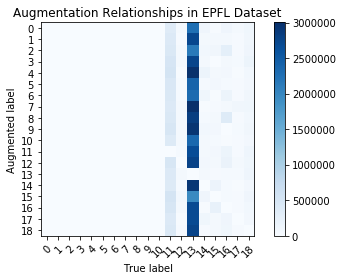

In [146]:
plot_confusion_matrix(results)
np.save('/home/giancarlo/code/epfl.npy', results)

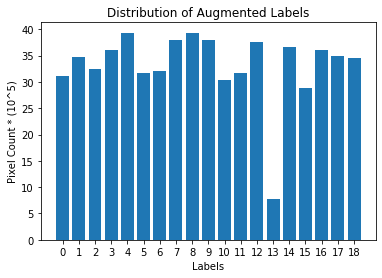

In [174]:
x_bar = range(0,19, 1)
totals = np.sum(results, axis=1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, totals/100000)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count * (10^5)')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Augmented Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

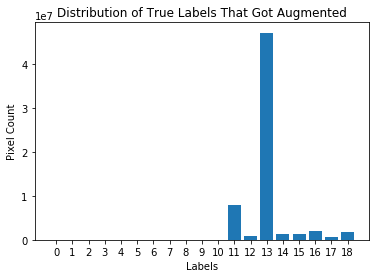

In [165]:
x_bar = range(0,19, 1)
totals = np.sum(results, axis=0)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, totals)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of True Labels That Got Augmented')
ax.set_xticks(x_bar)

In [168]:
print(results[:,11:])

[[ 362217   58769 2261591  125785   19386  119600   51431  107482]
 [ 404450   34682 2729845   61245   57922   56415   29623   95765]
 [ 429480   53303 2140029   85177   97542  279657   27007  125653]
 [ 502559   47407 2746695   52529    1199   65616   35690  155381]
 [ 518650   23061 2982303  153130   62187   78816   17153   87308]
 [ 451491   38792 2416099   41035   71438   43337   33130   72986]
 [ 432709   39717 2313579  114299   17934  161941   25224   94832]
 [ 403217   66566 3002859   16588   34729   55708   99056  108425]
 [ 437361   68255 2834586   46244   66053  370958   26961   83532]
 [ 488975   53716 2937800   89837   75269    4744   40506  100733]
 [ 385923   66343 2354946   61539   44548   17450   27312   78121]
 [      0   38146 2670226   61853   73155  161914   32855  131834]
 [ 483951       0 2769617   78512   62882  195472   60732  115275]
 [ 409130   56364       0   70259   34880   35312   35982  130423]
 [ 395145   38700 2915398       0  168114   46892   23202   80

## FS Static Predictions

### Original Size 

In [225]:
# inputs
fs_static_data = '/home/giancarlo/data/innosuisse/fs_static'

semantic_paths = [os.path.join(fs_static_data, 'semantic', image) 
                  for image in os.listdir(os.path.join(fs_static_data, 'semantic'))]
label_paths = [os.path.join(fs_static_data, 'labels', image)
                  for image in os.listdir(os.path.join(fs_static_data, 'labels'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [226]:
results = [0]*19

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 10) == 0:
        print(idx)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
10
20


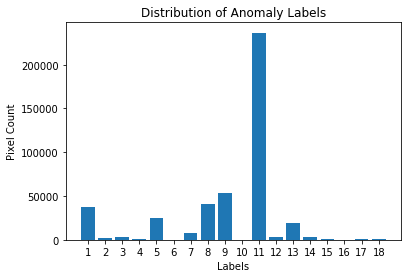

In [227]:
x_bar = range(1,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[1:])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

In [309]:
# inputs
data = '/home/giancarlo/data/innosuisse/fs_static'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred'))]
predictions_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)
predictions_paths = natsorted(predictions_paths)

In [310]:
results_2 = [0]*30
results = [0]*30

for idx, (semantic, label, predict) in enumerate(zip(semantic_paths, label_paths, predictions_paths)):        
    if (idx % 10) == 0:
        print(idx)
    predict_img = Image.open(predict)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic).resize(predict_img.size))
    predict_img = np.array(predict_img)

    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    predict_img_flat = predict_img.flatten()
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1
            if predict_img_flat[idx]==1:
                results_2[semantic_img_flat[idx]] += 1

0
10
20


21.499692188939214


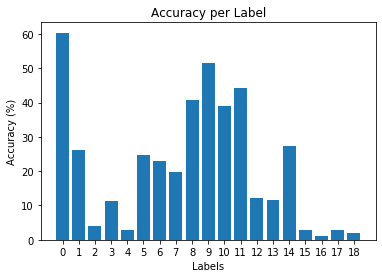

In [311]:
precision = [result_2/result*100 for result, result_2 in zip(results, results_2) if result_2 != 0]

x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, precision[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Labels')
ax.set_title('Accuracy per Label')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')
print(sum(precision)/19)

## FS Lost Found

In [221]:
# inputs
data = '/home/giancarlo/data/innosuisse/fs_lost_and_found'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [222]:
results = [0]*19

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 10) == 0:
        print(idx)
    print(semantic)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    print(np.unique(semantic_img_flat))
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_0.png
[ 0  1  2  4  5  6  7  8  9 10 11 13 14]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_1.png
[ 0  1  2  3  4  5  7  8  9 10 11 13 14 15 16 17 18]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_2.png
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_3.png
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 18]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_4.png
[ 0  1  2  3  4  5  7  8  9 10 13 14 15 16]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_5.png
[ 0  1  2  4  5  6  8  9 10 11 12 13 15 16 17 18]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_6.png
[ 0  1  2  3  4  5  6  7  8 10 11 13 14 15 17]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_7.png
[ 0  1

/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_64.png
[ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_65.png
[ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_66.png
[ 0  1  2  3  4  5  7  8  9 10 11 13 14]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_67.png
[ 0  1  2  3  4  5  7  8  9 10 11 13 14 16]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_68.png
[ 0  1  2  4  5  6  7  8  9 10 12 13 14 15 16 17]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_69.png
[ 0  1  2  3  4  5  8  9 10 11 13]
70
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_70.png
[ 0  1  2  3  4  5  8  9 10 11 13 14 15 18]
/home/giancarlo/data/innosuisse/fs_lost_and_found/semantic/pred_mask_image_71.png
[ 0  1  2  3  4  5  6  7  8  9

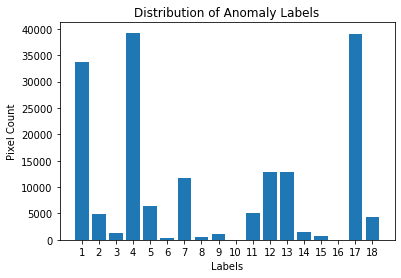

In [224]:
x_bar = range(1,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[1:])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

In [297]:
# inputs
data = '/home/giancarlo/data/innosuisse/fs_lost_and_found'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred'))]
predictions_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)
predictions_paths = natsorted(predictions_paths)

In [298]:
results_2 = [0]*30
results = [0]*30

for idx, (semantic, label, predict) in enumerate(zip(semantic_paths, label_paths, predictions_paths)):        
    if (idx % 10) == 0:
        print(idx)
    predict_img = Image.open(predict)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic).resize(predict_img.size))
    predict_img = np.array(predict_img)

    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    predict_img_flat = predict_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1
            if predict_img_flat[idx]==1:
                results_2[semantic_img_flat[idx]] += 1

0
10
20
30
40
50
60
70
80
90


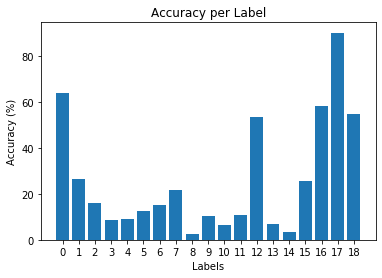

In [303]:
precision = [result_2/result*100 for result, result_2 in zip(results, results_2) if result_2 != 0]

x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, precision[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Labels')
ax.set_title('Accuracy per Label')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

## Road Anomaly

In [258]:
# inputs
data = '/home/giancarlo/data/innosuisse/road_anomaly'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]

# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [259]:
results = [0]*35

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 10) == 0:
        print(idx)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
10
20
30
40
50


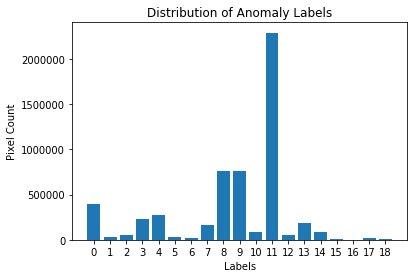

In [260]:
x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

In [261]:
# inputs
data = '/home/giancarlo/data/innosuisse/road_anomaly'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'pred'))]
predictions_paths = [os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label', image)
                  for image in os.listdir(os.path.join(data, 'predictions', 'spade_custom_dynamic_epfl', 'label'))]
        
# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)
predictions_paths = natsorted(predictions_paths)

In [276]:
results_2 = [0]*35
results = [0]*35

for idx, (semantic, label, predict) in enumerate(zip(semantic_paths, label_paths, predictions_paths)):        
    if (idx % 10) == 0:
        print(idx)
    predict_img = Image.open(predict)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic).resize(predict_img.size))
    predict_img = np.array(predict_img)

    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    predict_img_flat = predict_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1
            if predict_img_flat[idx]==1:
                results_2[semantic_img_flat[idx]] += 1

0
10
20
30
40
50


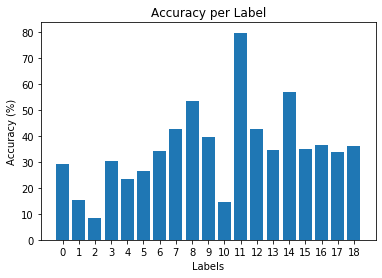

In [280]:
precision = [result_2/result*100 for result, result_2 in zip(results, results_2) if result_2 != 0]

x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, precision[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Labels')
ax.set_title('Accuracy per Label')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

## Custom Dataset

In [15]:
# inputs
data = '/home/giancarlo/data/innosuisse/custom'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]

# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [16]:
results = [0]*35

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 100) == 0:
        print(idx)
    label_img = np.array(Image.open(label).resize((512, 256)))
    semantic_img = np.array(Image.open(semantic).resize((512, 256)))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900


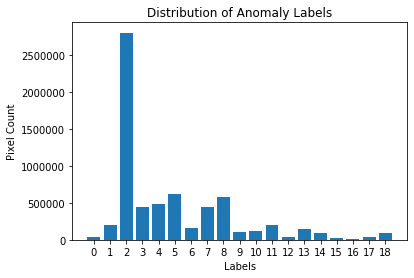

In [17]:
x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

## WILD DASH

In [6]:
# inputs
data = '/home/giancarlo/data/innosuisse/wild_dash'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]

# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [7]:
results = [0]*19

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 10) == 0:
        print(idx)
    label_img = np.array(Image.open(label))
    semantic_img = np.array(Image.open(semantic))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
10
20
30
40
50
60


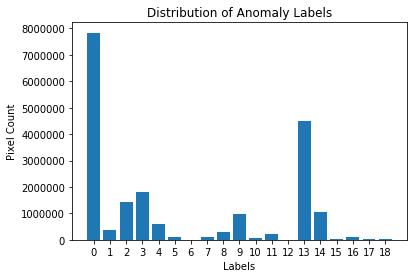

In [8]:
x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

## Mapillary Val

In [18]:
# inputs
data = '/home/giancarlo/data/innosuisse/mapi/val'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]

# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [19]:
results = [0]*35

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 100) == 0:
        print(idx)
    label_img = np.array(Image.open(label).resize((512, 256)))
    semantic_img = np.array(Image.open(semantic).resize((512, 256)))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


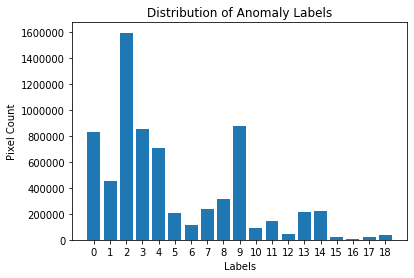

In [20]:
x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')

## Custom Dynamic

In [23]:
# inputs
data = '/home/giancarlo/data/innosuisse/custom_dynamic'

semantic_paths = [os.path.join(data, 'semantic', image) 
                  for image in os.listdir(os.path.join(data, 'semantic'))]
label_paths = [os.path.join(data, 'labels', image)
                  for image in os.listdir(os.path.join(data, 'labels'))]

# We need to sort the images to ensure all the pairs match with each other
semantic_paths = natsorted(semantic_paths)
label_paths = natsorted(label_paths)

In [24]:
results = [0]*35

for idx, (semantic, label) in enumerate(zip(semantic_paths, label_paths)):        
    if (idx % 100) == 0:
        print(idx)
    label_img = np.array(Image.open(label).resize((512, 256)))
    semantic_img = np.array(Image.open(semantic).resize((512, 256)))
    semantic_img_flat = semantic_img.flatten()
    label_img_flat = label_img.flatten()
    
    for idx, pixel in enumerate(label_img_flat):
        if pixel ==  1:
            results[semantic_img_flat[idx]] += 1

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300


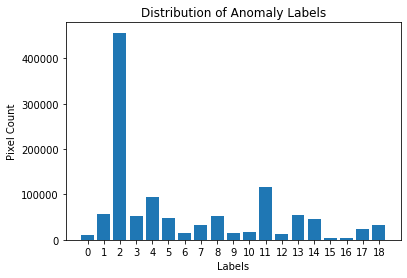

In [25]:
x_bar = range(0,19, 1)
fig, ax = plt.subplots()
rects1 = ax.bar(x_bar, results[:19])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Pixel Count')
ax.set_xlabel('Labels')
ax.set_title('Distribution of Anomaly Labels')
ax.set_xticks(x_bar)
ax.ticklabel_format(axis='y', style='scientific')